# Sublevelset Filtrations
Optimzation on data points to increase/decrease polynomial features defined on persistent homology built from Sublevelset Filtration.

In [1]:
import time
import torch
import torch.nn as nn
import torch_tda
import numpy as np
import matplotlib.pyplot as plt
import bats
from tqdm import tqdm

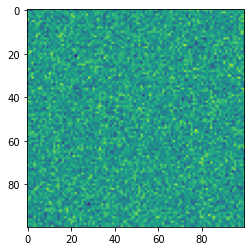

In [2]:
n = 100
img = np.random.randn(n,n)
f = img.flatten()
plt.imshow(img)

In [3]:
X = bats.LightFreudenthal(n,n)
D = torch_tda.nn.SublevelsetDiagram(X, maxdim=1, reduction_flags=(bats.standard_reduction_flag(), bats.clearing_flag()))

ft = torch.tensor(f, requires_grad=True)

We will maximize the sum of length all persistence pairs. 

In [4]:
optimizer = torch.optim.Adam([ft], lr=1e-1)

losses = []
for i in tqdm(range(20)):
    optimizer.zero_grad()
    dgms = D(ft)
    loss = - torch.sum(dgms[1][:,1] - dgms[1][:,0])
    losses.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

100%|████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 16.88it/s]


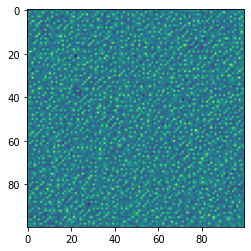

In [5]:
plt.imshow(ft.detach().numpy().reshape(100,100))

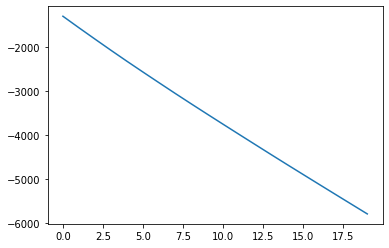

In [6]:
plt.plot(losses)